# Calculating countries' forest area using SSP1_26 scenario

Author: Firza Riany  
Email: firza.riany@climateanalytics.org  
Date: 02.07.2021 - 07.07.2021

Aim(s) of analysis:  
1. Observing the distribution of forest land in Brazil  
2. Calculating the amount of Brazilian forest  

Datasets:  
- Land cover allocation from IMAGE: `GLANDCOVER_30MIN.nc`  
- World borders: `TM_WORLD_BORDERS-0`  
- Total land area: `GAREA_30M.asc` to calculate the area of each land use type  
- Scenario:`SSP1_26`
- Model: `IMAGE`  

Description:  
- Deforestation still happens until 2050. Post-2050 forest area is increasing.  
- The trend is in line with the previous analysis where forest emission is decreased in 2050 and sequestration is increased post-2050.  

In [1]:
# libraries 
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regionmask
import os

In [2]:
%matplotlib inline


In [3]:
os.getcwd()


'/Users/firzariany/Documents/ikea_land_use/1o5_pathways_land_use/scripts'

# Using SSP1_26

In [9]:
# source the data from box
path = "/Users/firzariany/Box/Climate Policy Team/02 - Projects/IKEA NDC 1.5° Pathways 20-22/2- Work Packages/WP3 -  LULUCF Pathways/Workflow/Data/IMAGE_SSPs/"

ssp_26 = path + "SSP1_26/GLANDCOVER_30MIN.nc"

df_26 = (xr.open_dataset(ssp_26))

In [6]:
# global land area
ar_file = path + "GAREA_30M.asc"

area = (xr.open_rasterio(ar_file)
       .rename({"y" : "latitude", "x" : "longitude"})
        .sel(band = 1)
       )


In [5]:
# world border
b_file = path + "TM_WORLD_BORDERS-0"

regions = gpd.read_file(b_file)


In [10]:
# select land cover variable from land use pattern dataset
glandcov_26 = df_26.GLANDCOVER_30MIN


In [12]:
# glandcov_26


## Calculating forest area

In [13]:
# function to get a forest area in several years
# for SSP1_26
def area_yr(variable, date):
    forest_df = variable.sel(N = b'3', time = date)
    for_area = forest_df * area
    return for_area


In [13]:
years = ["2020-01-01", "2030-01-01", "2050-01-01", "2100-01-01"]


In [14]:
# store it into area per year (run one by one)
area_20 = area_yr(glandcov_26, "2020-01-01")


In [15]:
area_30 = area_yr(glandcov_26, "2030-01-01")


In [16]:
area_50 = area_yr(glandcov_26, "2050-01-01")


In [17]:
area_100 = area_yr(glandcov_26, "2100-01-01")


In [23]:
# fun forest area per region
def area_reg(reg_name, area):
    reg = reg_name
    area_set = area.rio.set_crs(4326)
    g_reg = reg.geometry
    clipped = area_set.rio.clip(g_reg, area_set.rio.crs)
    return clipped


---
## Getting only the forest distribution

In [18]:
# fun forest distribution
def dist_reg(variable, date, reg_name):
    dist_df = variable.sel(N = b'3', time = date)
    dist_df = dist_df.rio.set_crs("epsg:4326")
    reg = reg_name
    g_reg = reg.geometry
    clipped = dist_df.rio.clip(g_reg, dist_df.rio.crs)
    return clipped


---
## Analysing forest distribution, SSP1_26

### Brazil in 2030

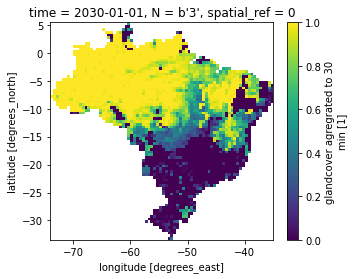

In [19]:
br = regions[regions.ISO3 == "BRA"]

plt.figure(figsize=[5,4])
dist_reg(glandcov_26, "2030-01-01", br).plot()


### Indonesia in 2030

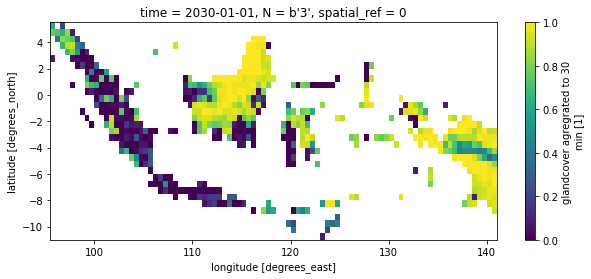

In [20]:
indo = regions[regions.ISO3 == "IDN"]

plt.figure(figsize=[10,4])
dist_reg(glandcov_26, "2030-01-01", indo).plot()


### Eastern Africa in 2030

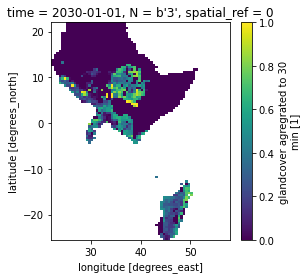

In [21]:
eaf_iso = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MUS", "RWA", "SYC", "SOM", "SDN", "UGA"]
eaf = regions[regions.ISO3.isin(eaf_iso)]

plt.figure(figsize=[4,4])
dist_reg(glandcov_26, "2030-01-01", eaf).plot()


---
## Temporal evolution of forest area using SSP1_26

### Brazil in 2020, 2030, 2050, 2100

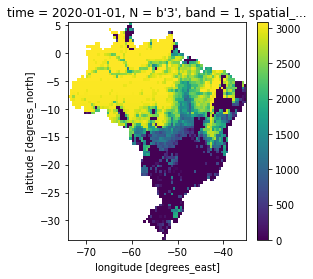

In [24]:
# 2020
# br = regions[regions.ISO3 == "BRA"]

plt.figure(figsize=[4,4])
area_reg(br, area_20).plot()


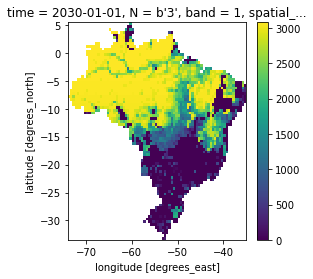

In [25]:
# 2030
plt.figure(figsize=[4,4])
area_reg(br, area_30).plot()


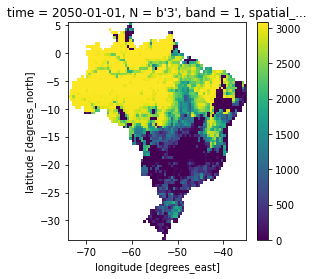

In [26]:
# 2050
plt.figure(figsize=[4,4])
area_reg(br, area_50).plot()


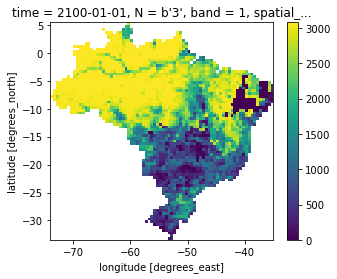

In [27]:
# 2100
plt.figure(figsize=[5,4])
area_reg(br, area_100).plot()


In [28]:
# total forest area in Brazil
area_reg(br, area_20).sum()


<xarray.DataArray ()>
array(4939772.5, dtype=float32)
Coordinates:
    time         datetime64[ns] 2020-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [29]:
area_reg(br, area_30).sum()


<xarray.DataArray ()>
array(5025869.5, dtype=float32)
Coordinates:
    time         datetime64[ns] 2030-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [30]:
area_reg(br, area_50).sum()


<xarray.DataArray ()>
array(5036201., dtype=float32)
Coordinates:
    time         datetime64[ns] 2050-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [31]:
area_reg(br, area_100).sum()


<xarray.DataArray ()>
array(5700566.5, dtype=float32)
Coordinates:
    time         datetime64[ns] 2100-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

----

### Indonesia in 2020, 2030, 2050, 2100

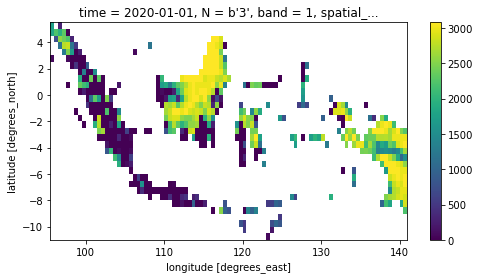

In [31]:
# 2020
# indo = regions[regions.ISO3 == "IDN"]

plt.figure(figsize=[8,4])
area_reg(indo, area_20).plot()


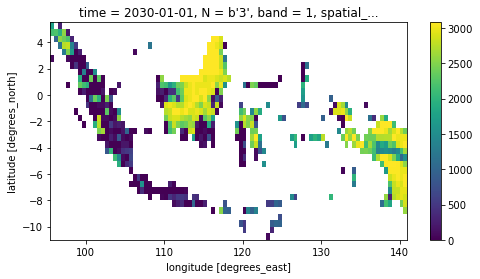

In [32]:
# 2030
plt.figure(figsize=[8,4])
area_reg(indo, area_30).plot()


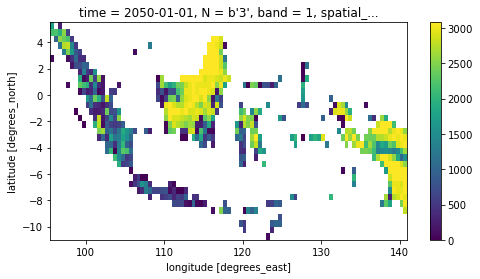

In [33]:
# 2050
plt.figure(figsize=[8,4])
area_reg(indo, area_50).plot()


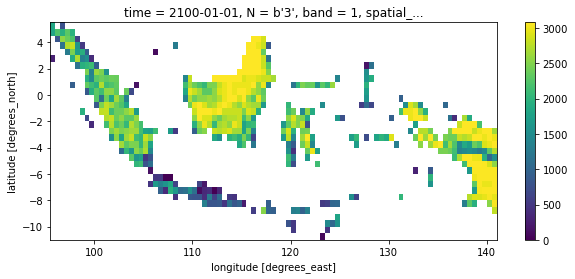

In [34]:
# 2100
plt.figure(figsize=[10,4])
area_reg(indo, area_100).plot()


In [35]:
# total forest area
area_reg(indo, area_20).sum()


<xarray.DataArray ()>
array(899726.4, dtype=float32)
Coordinates:
    time         datetime64[ns] 2020-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [36]:
area_reg(indo, area_30).sum()


<xarray.DataArray ()>
array(915673.6, dtype=float32)
Coordinates:
    time         datetime64[ns] 2030-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [37]:
area_reg(indo, area_50).sum()


<xarray.DataArray ()>
array(1030826.4, dtype=float32)
Coordinates:
    time         datetime64[ns] 2050-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [38]:
area_reg(indo, area_100).sum()


<xarray.DataArray ()>
array(1306992.2, dtype=float32)
Coordinates:
    time         datetime64[ns] 2100-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

---

### Eastern Africa in 2020, 2030, 2050, 2100

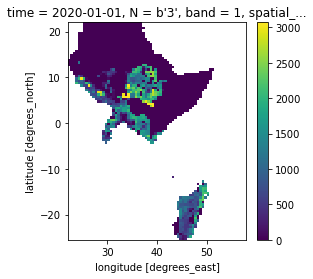

In [41]:
# EAF forest distribution, 2020
plt.figure(figsize=[4,4])
area_reg(eaf, area_20).plot()


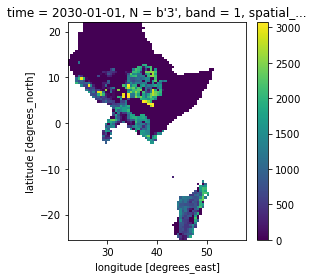

In [42]:
# EAF, distribution 2030
plt.figure(figsize=[4,4])
area_reg(eaf, area_30).plot()


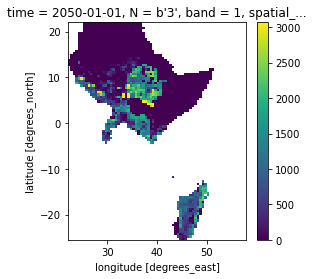

In [43]:
# EAF, distribution 2050
plt.figure(figsize=[4,4])
area_reg(eaf, area_50).plot()


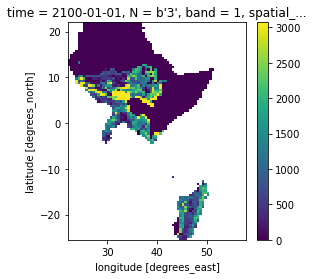

In [44]:
# EAF, distribution 2100
plt.figure(figsize=[4,4])
area_reg(eaf, area_100).plot()


In [45]:
# total forest area, 2020
area_reg(eaf, area_20).sum()


<xarray.DataArray ()>
array(772210.2, dtype=float32)
Coordinates:
    time         datetime64[ns] 2020-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [46]:
# total area, 2030
area_reg(eaf, area_30).sum()


<xarray.DataArray ()>
array(772296.3, dtype=float32)
Coordinates:
    time         datetime64[ns] 2030-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [47]:
# total area, 2050
area_reg(eaf, area_50).sum()


<xarray.DataArray ()>
array(790326.44, dtype=float32)
Coordinates:
    time         datetime64[ns] 2050-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

In [48]:
# total area, 2100
area_reg(eaf, area_100).sum()


<xarray.DataArray ()>
array(1034241.6, dtype=float32)
Coordinates:
    time         datetime64[ns] 2100-01-01
    N            |S1 b'3'
    band         int64 1
    spatial_ref  int64 0

---
## Reference scenario: forest distribution

In [63]:
# source
path = "/Users/firzariany/Box/Climate Policy Team/02 - Projects/IKEA NDC 1.5° Pathways 20-22/2- Work Packages/WP3 -  LULUCF Pathways/Workflow/Data/IMAGE_SSPs/"

ref = path + "SSP1/GLANDCOVER_30MIN.nc"

df_ref = xr.open_dataset(ref)

In [65]:
# select land cover variable
glandcov_ref = df_ref.GLANDCOVER_30MIN

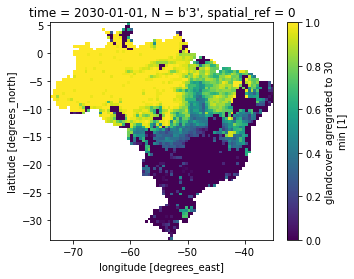

In [66]:
plt.figure(figsize=[5,4])
dist_reg(glandcov_ref, "2030-01-01", br).plot()

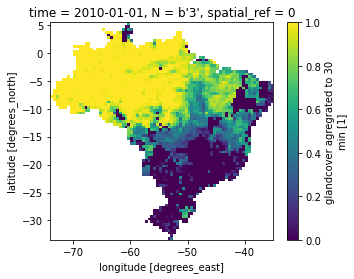

In [69]:
plt.figure(figsize=[5,4])
dist_reg(glandcov_ref, "2010-01-01", br).plot()

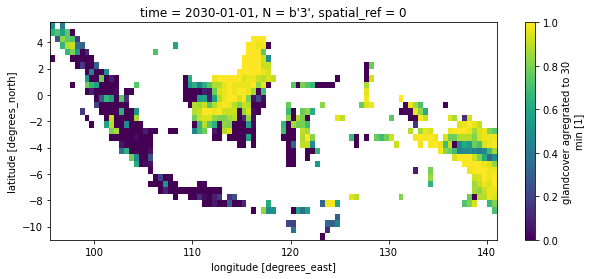

In [67]:
plt.figure(figsize=[10,4])
dist_reg(glandcov_ref, "2030-01-01", indo).plot()

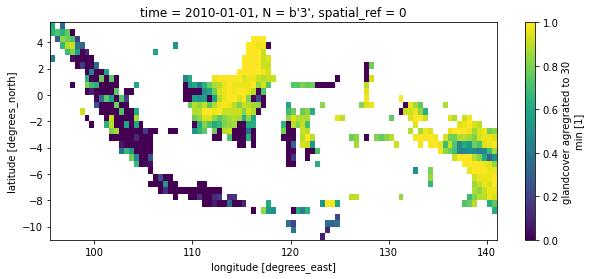

In [70]:
plt.figure(figsize=[10,4])
dist_reg(glandcov_ref, "2010-01-01", indo).plot()

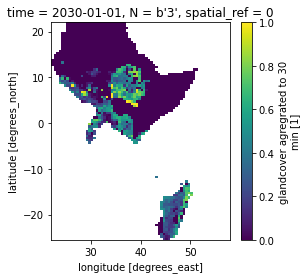

In [68]:
plt.figure(figsize=[4,4])
dist_reg(glandcov_ref, "2030-01-01", eaf).plot()

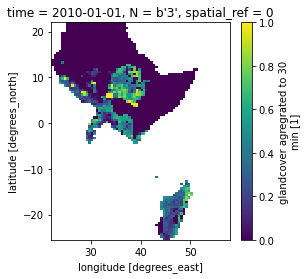

In [71]:
plt.figure(figsize=[4,4])
dist_reg(glandcov_ref, "2010-01-01", eaf).plot()